In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

hcc = "./HCC_RagNoRag.xlsx"
paca = "./Paca_RagNoRag.xlsx"
crc = "./CRC_RagNoRag.xlsx"

hcc_df = pd.read_excel(hcc)
paca_df = pd.read_excel(paca)
crc_df = pd.read_excel(crc)

In [7]:
def prepare_for_heatmap(df):
    melted_df = df.melt(id_vars=['question'], var_name='setting_outcome', value_name='count')
    melted_df[['setting', 'outcome']] = melted_df['setting_outcome'].str.split('_', expand=True)
    melted_df.drop('setting_outcome', axis=1, inplace=True)
    melted_df = melted_df[['question', 'setting', 'outcome', 'count']]
    return melted_df


hcc = prepare_for_heatmap(hcc_df)
paca = prepare_for_heatmap(paca_df)
crc = prepare_for_heatmap(crc_df)

hcc.head()

,question,setting,outcome,count
0,recommended treatment options for first line t...,RAG,correct,5
1,precise recommendations and use cases of Atezo...,RAG,correct,6
2,second line treatments?,RAG,correct,7
3,use of cabozantinib?,RAG,correct,7
4,use of regorafenib?,RAG,correct,6


In [88]:
def split_text_on_space(text, max_length):
    words = text.split()
    lines = []
    current_line = ""

    for word in words:
        if len(current_line) + len(word) + 1 <= max_length:
            current_line += (word + " ")
        else:
            lines.append(current_line.strip())
            current_line = word + " "

    if current_line:
        lines.append(current_line.strip())

    return '\n'.join(lines)


def plot(df, name):
    df['question'] = df['question'].astype(str)
    unique_questions = df['question'].unique()

    aspect_ratio = 3 / 2

    _, axes = plt.subplots(2, 5, figsize=(20, 5*aspect_ratio), sharex=True, sharey=True)

    axes_flat = axes.flatten()

    for i, question_number in enumerate(unique_questions):
            if i >= 10:
                break

            question_data = df[df['question'] == question_number]
            
            pivot_table = question_data.pivot(index="setting", columns="outcome", values="count")

            ax = axes_flat[i]
            sns.heatmap(pivot_table, annot=True, fmt="d", cmap="Blues", ax=ax, cbar=False, square=True, annot_kws={"size": 12})
            
            question_text = split_text_on_space(question_number, 40)
            
            ax.set_title(question_text)
            
            ax.set_xlabel('')
            
            ax.set_xticklabels(pivot_table.columns, rotation=0, fontsize=14)
            
            if i % 5 != 0:
                ax.set_yticklabels([])
                ax.set_ylabel('')
            else:
                ax.set_yticklabels(pivot_table.index)

            ax.tick_params(axis='both', which='both', length=0)

            for _, spine in ax.spines.items():
                spine.set_visible(True)
                spine.set_edgecolor('black')
                spine.set_linewidth(0.25)

    
    plt.tight_layout()


    plt.savefig(f"{name}.png", format='png', dpi=300)
    plt.savefig(f"{name}.pdf", format='pdf')

    plt.show()



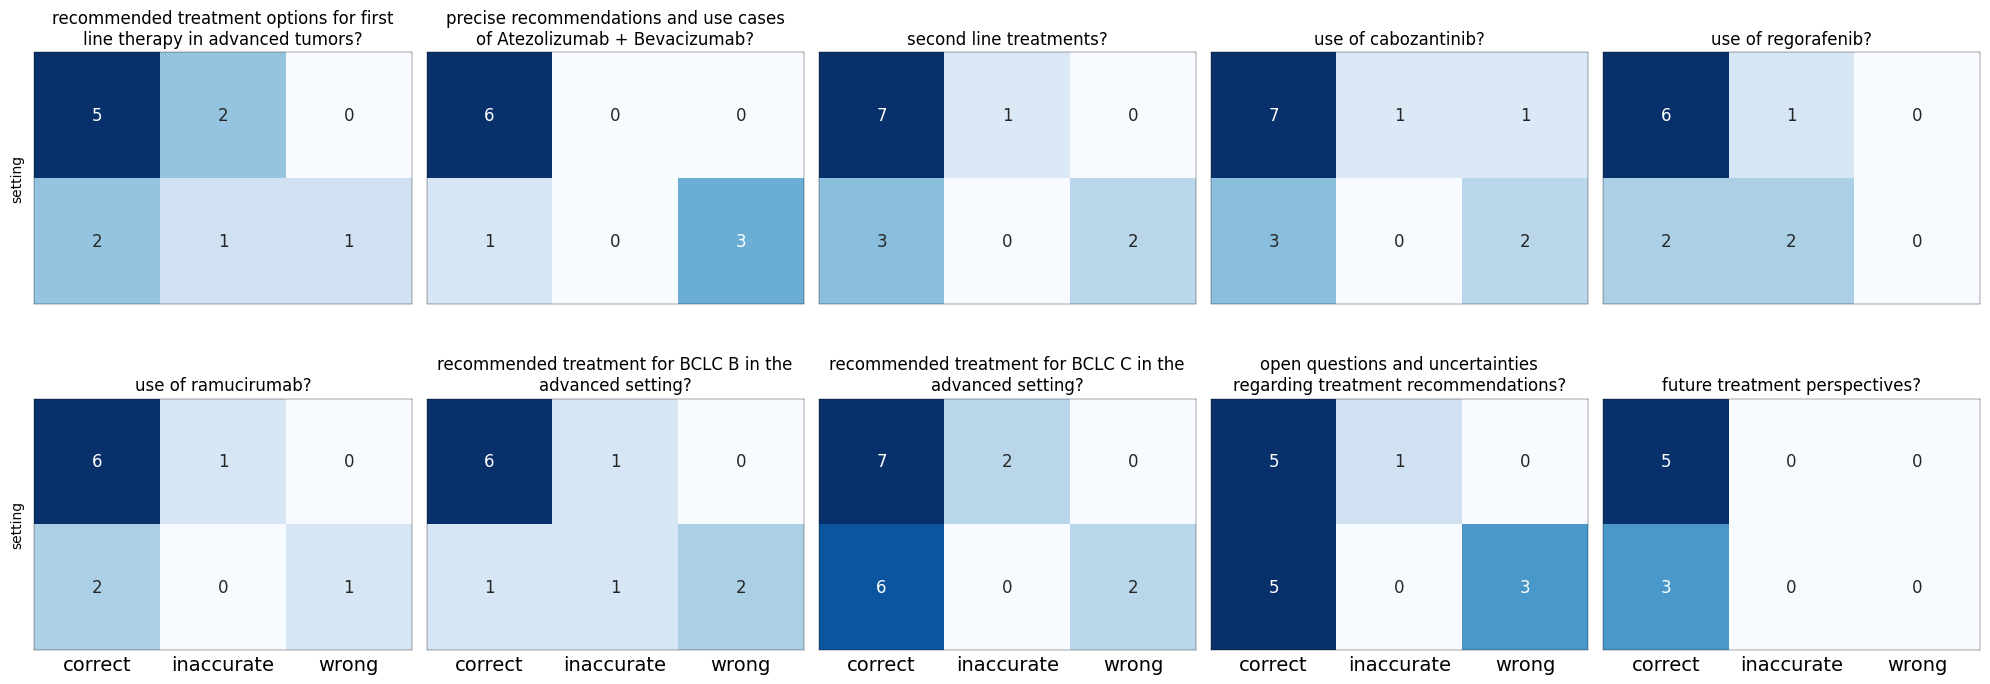

In [89]:
plot(hcc, "hcc")

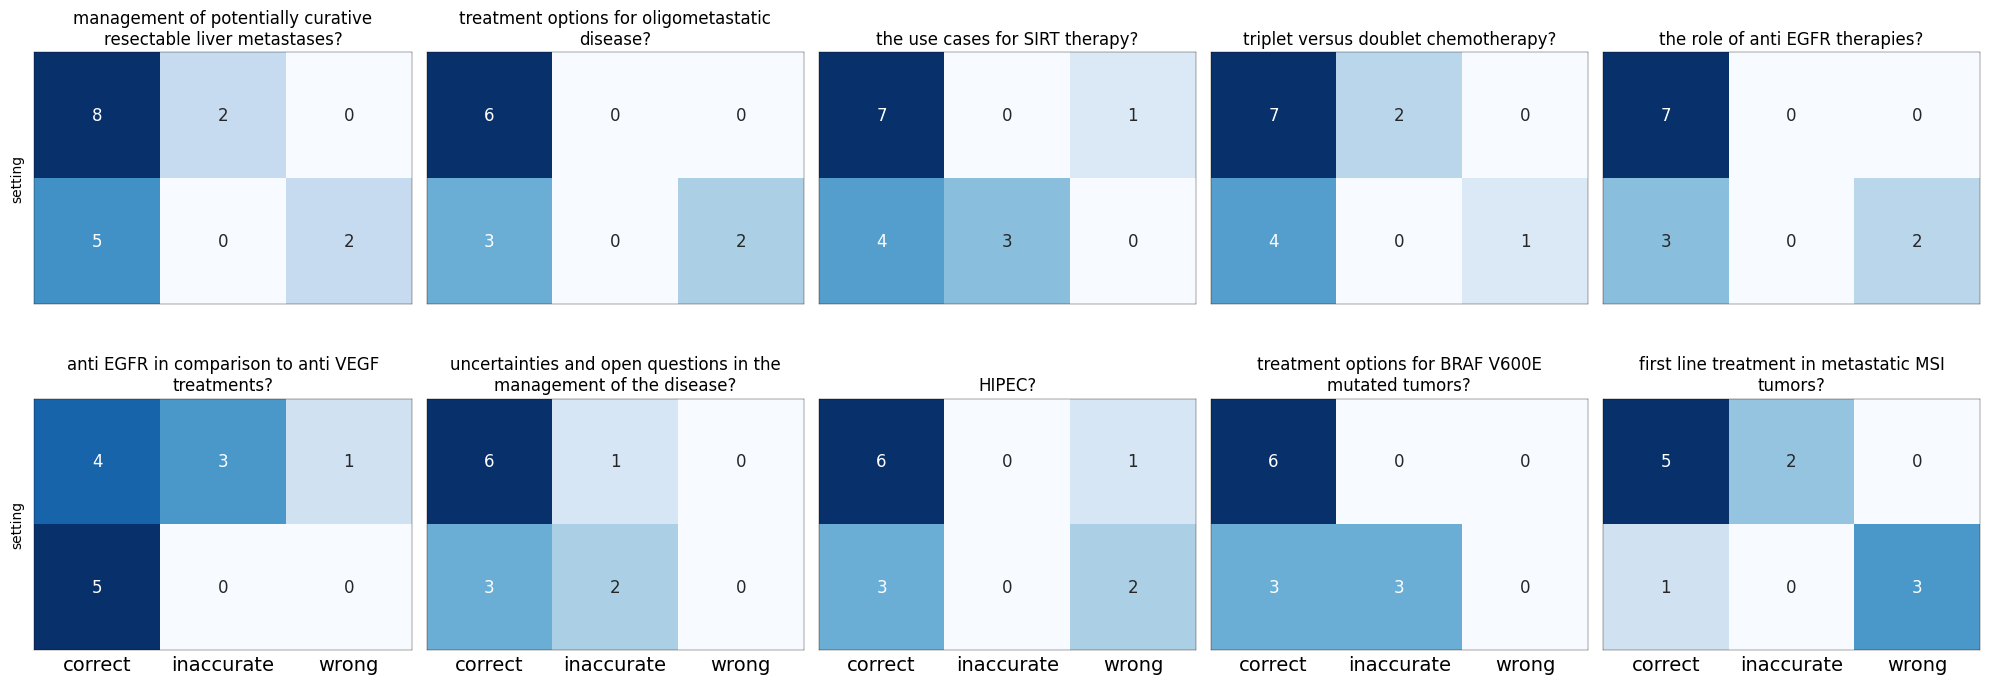

In [90]:
plot(crc, "crc")

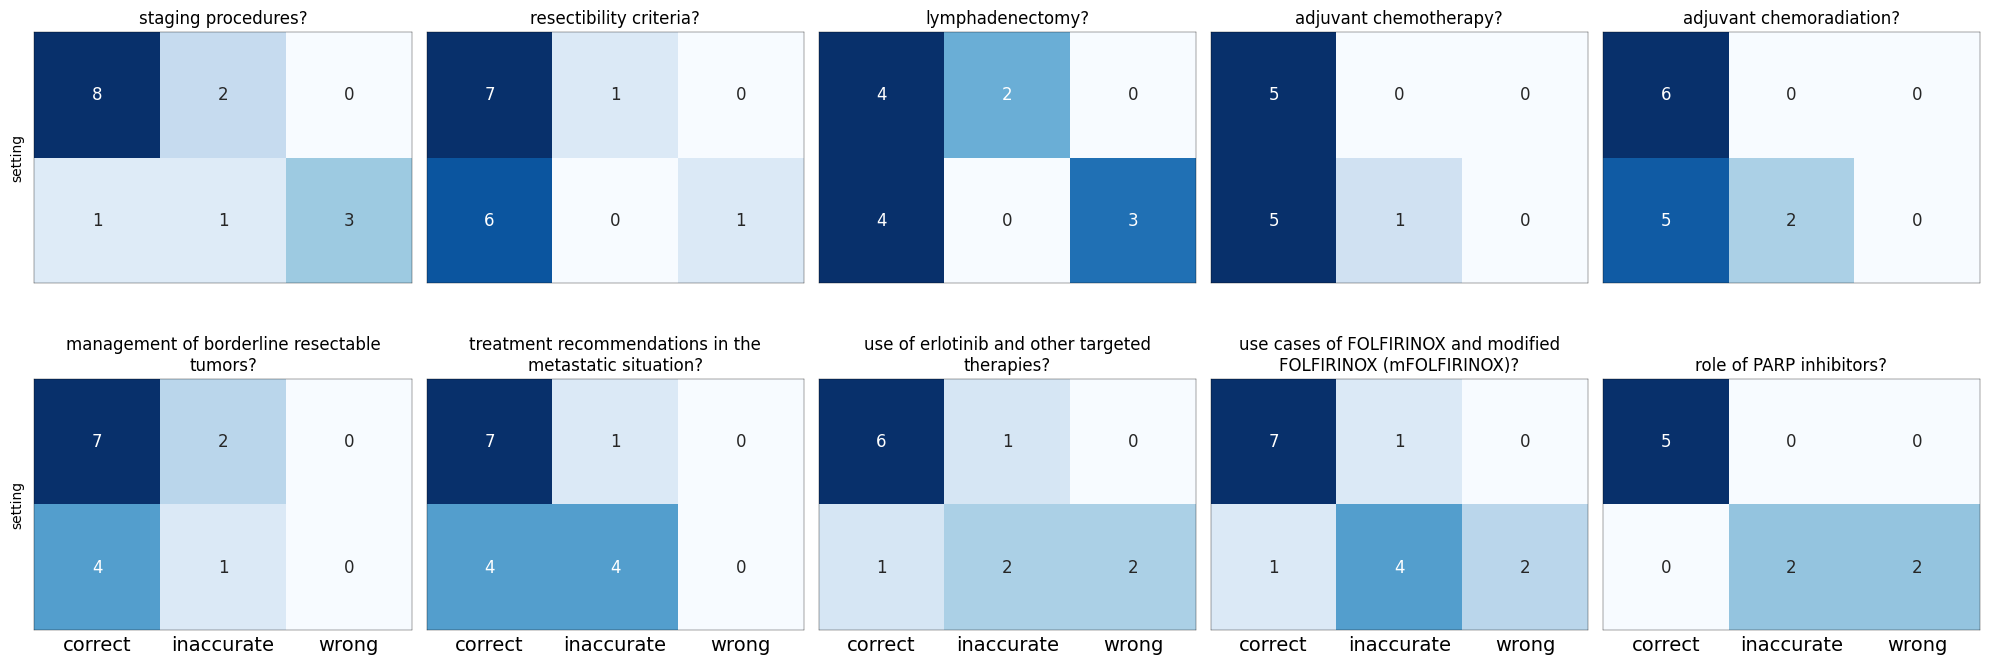

In [91]:
plot(paca, "paca")